In [13]:
import pandas as pd
import numpy as np

# Load the cleaned dataset using the full path
df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")

# Load the cleaned dataset

print(df.head())


                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015

In [14]:
df['price_offpeak_dec_jan_diff'] = (
    df['var_year_price_off_peak_fix'] -
    df['var_6m_price_off_peak_fix']
)


In [15]:
df['price_volatility_offpeak'] = (
    df['var_year_price_off_peak_var'] - df['var_6m_price_off_peak_var']
)


In [16]:
df['pct_change_offpeak'] = (
    df['var_year_price_off_peak_var'] / (df['var_6m_price_off_peak_var'] + 1e-5)
)


In [17]:
df['total_consumption'] = df['cons_12m'] + df['cons_gas_12m']


In [18]:
df['margin_ratio'] = (
    df['margin_net_pow_ele'] / (df['margin_gross_pow_ele'] + 1e-5)
)


In [19]:
df['is_dual_fuel'] = df['has_gas'].apply(lambda x: 1 if x=='t' else 0)


In [11]:
df[['price_offpeak_dec_jan_diff',
    'price_volatility_offpeak',
    'pct_change_offpeak',
    'total_consumption',
    'margin_ratio',
    'is_dual_fuel'
   ]].head()


,price_offpeak_dec_jan_diff,price_volatility_offpeak,pct_change_offpeak,total_consumption,margin_ratio,is_dual_fuel
0,-0.983509,-0.000070,0.433313,54946,1.000000,1
1,-0.003017,0.000002,0.366636,4660,0.999999,0
2,0.007662,0.000002,0.422886,544,1.000000,0
3,0.006465,0.000002,0.402958,1584,1.000000,0
4,0.005429,0.000004,0.701438,4425,1.000000,0


In [12]:
df.to_csv("final_feature_engineered_data.csv", index=False)
print("Saved successfully!")


Saved successfully!


In [22]:
print(df.columns)


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

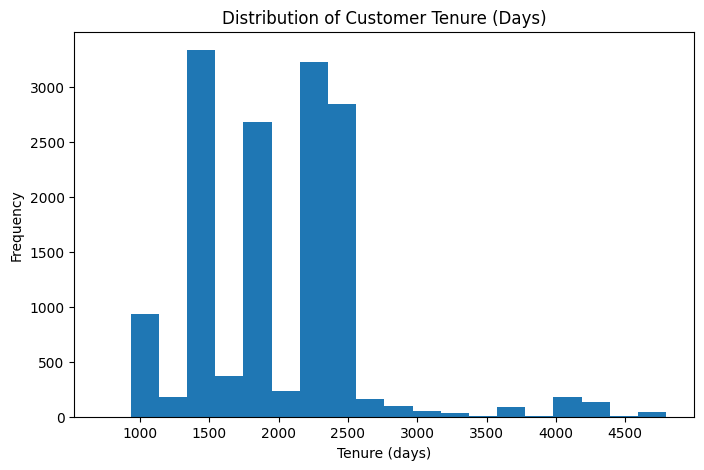

In [23]:
# Convert to datetime
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])

# Calculate tenure in days
df['tenure_days'] = (df['date_end'] - df['date_activ']).dt.days

# Plot
plt.figure(figsize=(8,5))
plt.hist(df['tenure_days'], bins=20)
plt.title("Distribution of Customer Tenure (Days)")
plt.xlabel("Tenure (days)")
plt.ylabel("Frequency")
plt.show()


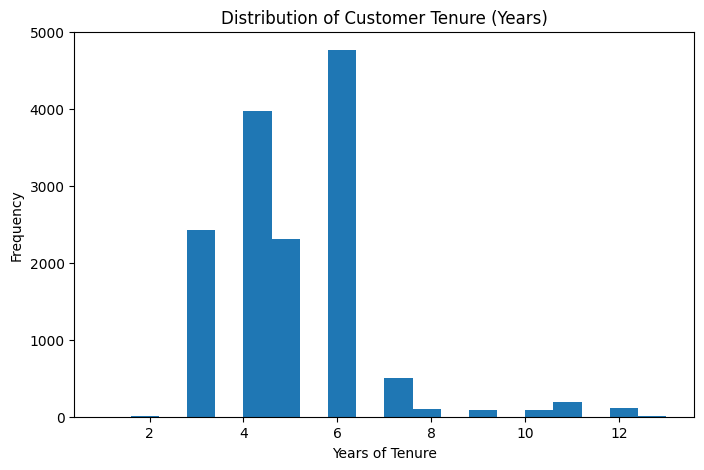

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['num_years_antig'], bins=20)
plt.title("Distribution of Customer Tenure (Years)")
plt.xlabel("Years of Tenure")
plt.ylabel("Frequency")
plt.show()


In [26]:
df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [27]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


3. Feature engineering
Difference between off-peak prices in December and preceding January
Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [31]:
import pandas as pd

# Load the dataset
price_df = pd.read_csv(r"C:\Users\HP\Desktop\price_data (1).csv")

# Convert price_date column to datetime
price_df["price_date"] = pd.to_datetime(price_df["price_date"], errors="coerce")

# Display first 5 rows
print(price_df.head())


                                 id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.

In [32]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [37]:
df['cons_change_12m'] = df['cons_last_month'] - (df['cons_12m'] / 12)
df['cons_change_ratio'] = df['cons_last_month'] / (df['cons_12m'] / 12)


In [38]:
df['forecast_error'] = df['forecast_cons_12m'] - df['cons_12m']
df['forecast_error_ratio'] = df['forecast_cons_12m'] / (df['cons_12m'] + 1)


In [39]:
vol_cols = [
    'var_year_price_off_peak_var', 'var_year_price_peak_var',
    'var_year_price_mid_peak_var'
]

df['avg_yearly_price_volatility'] = df[vol_cols].mean(axis=1)


In [47]:
df['margin_per_cons'] = df['net_margin'] / (df['total_consumption'] + 1)
df['gross_net_margin_ratio'] = df['margin_gross_pow_ele'] / (df['margin_net_pow_ele'] + 1)


In [43]:
df['antiquity_group'] = pd.cut(
    df['num_years_antig'],
    bins=[0, 3, 6, 10, 20],
    labels=['0–3 yrs', '3–6 yrs', '6–10 yrs', '10+ yrs']
)


In [45]:
# Create total consumption feature
df['total_consumption'] = df['cons_12m'] + df['cons_gas_12m'] + df['cons_last_month'].fillna(0)


In [46]:
df['dual_fuel_interaction'] = df['has_gas'].replace({'t':1,'f':0}) * df['total_consumption']


In [48]:
df['dual_fuel_interaction'] = df['has_gas'] * df['total_consumption']


In [51]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")


# 1. Consumption Change Features
df['cons_change_12m'] = df['cons_last_month'] - (df['cons_12m'] / 12)
df['cons_change_ratio'] = df['cons_last_month'] / ((df['cons_12m'] / 12) + 1)

# 2. Forecast Accuracy Features
df['forecast_error'] = df['forecast_cons_12m'] - df['cons_12m']
df['forecast_error_ratio'] = df['forecast_cons_12m'] / (df['cons_12m'] + 1)

# 3. Average Yearly Price Volatility
vol_cols = [
    'var_year_price_off_peak_var', 'var_year_price_peak_var',
    'var_year_price_mid_peak_var'
]
df['avg_yearly_price_volatility'] = df[vol_cols].mean(axis=1)

# 4. Margin Features
# --- FIX MISSING TOTAL_CONSUMPTION ---
df['total_consumption'] = df['cons_12m'] + df['cons_gas_12m']

df['margin_per_cons'] = df['net_margin'] / (df['total_consumption'] + 1)
df['gross_net_margin_ratio'] = df['margin_gross_pow_ele'] / (df['margin_net_pow_ele'] + 1)

# 5. Antiquity Group (tenure equivalent)
df['antiquity_group'] = pd.cut(
    df['num_years_antig'],
    bins=[0, 3, 6, 10, 20],
    labels=['0–3 yrs', '3–6 yrs', '6–10 yrs', '10+ yrs']
)

# 6. Dual Fuel Interaction
df['dual_fuel_interaction'] = df['has_gas'] * df['total_consumption']

# Save final engineered dataset
df.to_csv("clean_data_after_feature_engineering.csv", index=False)

df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,cons_change_12m,cons_change_ratio,forecast_error,forecast_error_ratio,avg_yearly_price_volatility,total_consumption,margin_per_cons,gross_net_margin_ratio,antiquity_group,dual_fuel_interaction
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000000,0.000000,0.00,0.000000,0.000176,54946,0.012357,0.962179,0–3 yrs,tttttttttttttttttttttttttttttttttttttttttttttt...
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,-388.333333,0.000000,-4470.05,0.040753,0.000205,4660,0.004053,0.942463,3–6 yrs,ffffffffffffffffffffffffffffffffffffffffffffff...
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,-45.333333,0.000000,-496.04,0.088000,0.000002,544,0.012110,0.966216,3–6 yrs,ffffffffffffffffffffffffffffffffffffffffffffff...
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,-132.000000,0.000000,-1343.96,0.151445,0.000002,1584,0.016063,0.967969,3–6 yrs,ffffffffffffffffffffffffffffffffffffffffffffff...
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,157.250000,1.422583,-3979.25,0.100712,0.000007,4425,0.010840,0.978218,3–6 yrs,ffffffffffffffffffffffffffffffffffffffffffffff...


In [52]:
df['dual_fuel_interaction'] = df['has_gas'].replace({'t':1,'f':0}) * df['total_consumption']


In [53]:
import pandas as pd

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")


print("Data loaded. Shape:", df.shape)
df.head()


Data loaded. Shape: (14606, 44)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [54]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date conversion complete.")
df[date_cols].head()


Date conversion complete.


,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09


In [55]:
df['tenure'] = (df['date_end'] - df['date_activ']).dt.days / 365
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

print("Tenure feature created.")
df[['date_activ', 'date_end', 'tenure']].head()


Tenure feature created.


,date_activ,date_end,tenure
0,2013-06-15,2016-06-15,3.002740
1,2009-08-21,2016-08-30,7.030137
2,2010-04-16,2016-04-16,6.005479
3,2010-03-30,2016-03-30,6.005479
4,2010-01-13,2016-03-07,6.150685


In [56]:
df['price_offpeak_dec_jan_diff'] = (
    df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
)

print("Price difference feature created.")
df[['var_year_price_off_peak', 'var_6m_price_off_peak', 
     'price_offpeak_dec_jan_diff']].head()


Price difference feature created.


,var_year_price_off_peak,var_6m_price_off_peak,price_offpeak_dec_jan_diff
0,1.102846,2.086425,-0.983579
1,0.006470,0.009485,-0.003015
2,0.007668,0.000004,0.007664
3,0.006470,0.000003,0.006467
4,0.005444,0.000011,0.005433


In [57]:
df['price_volatility_offpeak'] = df['var_year_price_off_peak'].std()

print("Price volatility feature created.")
df['price_volatility_offpeak'].head()


Price volatility feature created.


0    11.014406
1    11.014406
2    11.014406
3    11.014406
4    11.014406
Name: price_volatility_offpeak, dtype: float64

In [58]:
df['pct_change_offpeak'] = (
    (df['var_year_price_off_peak'] - df['var_6m_price_off_peak']) /
     df['var_6m_price_off_peak'].replace(0, 1)
)

print("Percentage price change feature created.")
df[['pct_change_offpeak']].head()


Percentage price change feature created.


,pct_change_offpeak
0,-0.471418
1,-0.317910
2,2146.957505
3,1948.854804
4,489.413085


In [59]:
df['total_consumption'] = (
    df['cons_12m'].fillna(0) +
    df['cons_gas_12m'].fillna(0) +
    df['cons_last_month'].fillna(0)
)

print("Total consumption feature created.")
df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'total_consumption']].head()


Total consumption feature created.


,cons_12m,cons_gas_12m,cons_last_month,total_consumption
0,0,54946,0,54946
1,4660,0,0,4660
2,544,0,0,544
3,1584,0,0,1584
4,4425,0,526,4951


In [60]:
df['margin_ratio'] = df['margin_net_pow_ele'] / df['margin_gross_pow_ele'].replace(0, 1)

print("Margin ratio feature created.")
df[['margin_net_pow_ele', 'margin_gross_pow_ele', 'margin_ratio']].head()


Margin ratio feature created.


,margin_net_pow_ele,margin_gross_pow_ele,margin_ratio
0,25.44,25.44,1.0
1,16.38,16.38,1.0
2,28.60,28.60,1.0
3,30.22,30.22,1.0
4,44.91,44.91,1.0


In [61]:
df['is_dual_fuel'] = df['has_gas'].replace({'t': 1, 'f': 0})

print("Dual fuel feature created.")
df[['has_gas', 'is_dual_fuel']].head()


Dual fuel feature created.


,has_gas,is_dual_fuel
0,t,1
1,f,0
2,f,0
3,f,0
4,f,0


In [62]:
df['dual_fuel_interaction'] = df['is_dual_fuel'] * df['total_consumption']

print("Dual fuel interaction feature created.")
df[['is_dual_fuel', 'total_consumption', 'dual_fuel_interaction']].head()


Dual fuel interaction feature created.


,is_dual_fuel,total_consumption,dual_fuel_interaction
0,1,54946,54946
1,0,4660,0
2,0,544,0
3,0,1584,0
4,0,4951,0


In [63]:
new_features = [
    'tenure',
    'price_offpeak_dec_jan_diff',
    'price_volatility_offpeak',
    'pct_change_offpeak',
    'total_consumption',
    'margin_ratio',
    'is_dual_fuel',
    'dual_fuel_interaction'
]

print("\nFINAL ENGINEERED FEATURES:")
df[new_features].head()



FINAL ENGINEERED FEATURES:


,tenure,price_offpeak_dec_jan_diff,price_volatility_offpeak,pct_change_offpeak,total_consumption,margin_ratio,is_dual_fuel,dual_fuel_interaction
0,3.002740,-0.983579,11.014406,-0.471418,54946,1.0,1,54946
1,7.030137,-0.003015,11.014406,-0.317910,4660,1.0,0,0
2,6.005479,0.007664,11.014406,2146.957505,544,1.0,0,0
3,6.005479,0.006467,11.014406,1948.854804,1584,1.0,0,0
4,6.150685,0.005433,11.014406,489.413085,4951,1.0,0,0


In [64]:
df.to_csv("engineered_dataset_task4.csv", index=False)
print("\nSaved as: engineered_dataset_task4.csv")



Saved as: engineered_dataset_task4.csv


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")

# Now you can safely drop columns
df = df.drop(['id', 'origin_up'], axis=1)

# Drop columns with only 1 unique value
to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=to_drop)

print(df.head())


                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  forecast_cons_12m  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23               0.00   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31             189.95   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17              47.96   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31             240.04   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  ...  var_6m_price_off_peak_var  v

In [3]:
cols_to_remove = [c for c in ['id', 'origin_up'] if c in df.columns]
df = df.drop(columns=cols_to_remove)


In [7]:
def clean_and_engineer(df):
    # Normalize column names
    df.columns = df.columns.str.strip().str.lower()
    
    # Drop ID-like columns if present
    cols_to_remove = [c for c in ['id', 'origin_up'] if c in df.columns]
    df = df.drop(columns=cols_to_remove, errors='ignore')
    
    # Drop columns with only 1 unique value
    to_drop = [col for col in df.columns if df[col].nunique() == 1]
    df = df.drop(columns=to_drop)
    
    # Feature engineering
    if 'cons_12m' in df.columns and 'net_margin' in df.columns:
        df['margin_per_cons'] = df['net_margin'] / df['cons_12m'].replace(0, np.nan)
    if 'margin_gross_pow_ele' in df.columns and 'margin_net_pow_ele' in df.columns:
        df['gross_net_margin_ratio'] = df['margin_gross_pow_ele'] / df['margin_net_pow_ele'].replace(0, np.nan)
    
    return df


In [11]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. LOAD DATA
# -----------------------------
df = pd.read_csv(r"C:\Users\HP\Desktop\\client_data (1).csv")

print("Loaded columns:", df.columns.tolist())

# -----------------------------
# 2. SAFE DROP OF IRRELEVANT COLUMNS
# -----------------------------
cols_to_drop = ['id', 'origin_up']

existing_to_drop = [col for col in cols_to_drop if col in df.columns]

df = df.drop(columns=existing_to_drop, errors='ignore')

print("Dropped:", existing_to_drop)

# -----------------------------
# 3. DROP COLUMNS WITH ONLY 1 UNIQUE VALUE
# -----------------------------
to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=to_drop)

print("Dropped single-value columns:", to_drop)

# -----------------------------
# 4. CREATE DATE FEATURES (SAFE)
# -----------------------------
date_cols = ['date_activ','date_end','date_modif_prod','date_renewal']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day

print("Date features created.")

# -----------------------------
# 5. TENURE FEATURE (SAFE)
# -----------------------------
if 'date_activ' in df.columns and 'date_end' in df.columns:
    df['tenure_days'] = (df['date_end'] - df['date_activ']).dt.days
else:
    df['tenure_days'] = np.nan   # fallback

print("Tenure created.")

# -----------------------------
# 6. COMBINED FEATURES
# -----------------------------
# total consumption feature
if 'cons_12m' in df.columns and 'cons_gas_12m' in df.columns:
    df['total_consumption'] = df['cons_12m'] + df['cons_gas_12m']

# margin ratio
if 'net_margin' in df.columns and 'margin_gross_pow_ele' in df.columns:
    df['margin_ratio'] = df['net_margin'] / df['margin_gross_pow_ele'].replace(0, np.nan)

# churn interaction
if 'tenure_days' in df.columns and 'churn' in df.columns:
    df['tenure_x_churn'] = df['tenure_days'] * df['churn']

print("Combined features created.")

# -----------------------------
# 7. FINAL OUTPUT
# -----------------------------
print("\nFinal dataframe shape:", df.shape)
print("Final columns:", df.columns.tolist())

df.head()


Loaded columns: ['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']
Dropped: ['id', 'origin_up']
Dropped single-value columns: []
Date features created.
Tenure created.
Combined features created.

Final dataframe shape: (14606, 40)
Final columns: ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,date_renewal_year,date_renewal_month,date_renewal_day,tenure_days,total_consumption,margin_ratio,tenure_x_churn
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,2015,11,1,2015,6,23,1096,54946,26.689858,1096
1,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,2009,8,21,2015,8,31,2566,4660,1.153236,0
2,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,2010,4,16,2015,4,17,2192,544,0.230769,0
3,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,2010,3,30,2015,3,31,2192,1584,0.842488,0
4,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,2010,1,13,2015,3,9,2245,4425,1.068359,0


In [13]:
# Cell 3 - Parse date columns
date_cols = ['date_activ','date_end','date_modif_prod','date_renewal']
for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=True)

print("Parsed dates (showing first 3 rows):")
display(df[date_cols].head(3))


Parsed dates (showing first 3 rows):


,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17


In [14]:
# Cell 4 - Tenure creation
if 'date_activ' in df.columns:
    # choose proxy date: prefer max of date_end, else date_renewal, else today
    proxy_date = None
    if 'date_end' in df.columns and not df['date_end'].isna().all():
        proxy_date = df['date_end'].max()
    if (proxy_date is None or pd.isna(proxy_date)) and 'date_renewal' in df.columns and not df['date_renewal'].isna().all():
        proxy_date = df['date_renewal'].max()
    if (proxy_date is None or pd.isna(proxy_date)):
        proxy_date = pd.to_datetime('today')

    df['tenure_days'] = (df['date_end'].fillna(proxy_date) - df['date_activ']).dt.days
    df['tenure_years'] = df['tenure_days'] / 365.0
else:
    df['tenure_days'] = np.nan
    df['tenure_years'] = np.nan

print("Tenure summary:")
display(df[['date_activ','date_end','tenure_days','tenure_years']].head(3))
print(df['tenure_years'].describe())


Tenure summary:


,date_activ,date_end,tenure_days,tenure_years
0,2013-06-15,2016-06-15,1096,3.002740
1,2009-08-21,2016-08-30,2566,7.030137
2,2010-04-16,2016-04-16,2192,6.005479


count    14606.000000
mean         5.500103
std          1.657194
min          2.002740
25%          4.002740
50%          5.009589
75%          6.446575
max         13.136986
Name: tenure_years, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load datasets
client_df = pd.read_csv(r"C:\Users\HP\Desktop\client_data (1).csv")
price_df = pd.read_csv(r"C:\Users\HP\Desktop\price_data (1).csv")
clean_df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")
client_df.head(), price_df.head()


(                                 id                     channel_sales  \
 0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
 1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
 2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
 3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
 4  149d57cf92fc41cf94415803a877cb4b                           MISSING   
 
    cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
 0         0         54946                0  2013-06-15  2016-06-15   
 1      4660             0                0  2009-08-21  2016-08-30   
 2       544             0                0  2010-04-16  2016-04-16   
 3      1584             0                0  2010-03-30  2016-03-30   
 4      4425             0              526  2010-01-13  2016-03-07   
 
   date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
 0      2015-11-01   2015-06-23               0.00  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load datasets

clean_df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")
client_df.head(), price_df.head()

(                                 id                     channel_sales  \
 0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
 1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
 2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
 3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
 4  149d57cf92fc41cf94415803a877cb4b                           MISSING   
 
    cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
 0         0         54946                0  2013-06-15  2016-06-15   
 1      4660             0                0  2009-08-21  2016-08-30   
 2       544             0                0  2010-04-16  2016-04-16   
 3      1584             0                0  2010-03-30  2016-03-30   
 4      4425             0              526  2010-01-13  2016-03-07   
 
   date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
 0      2015-11-01   2015-06-23               0.00  

In [20]:
print(df.columns.tolist())

['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn', 'date_activ_year', 'date_activ_month', 'date_activ_day', 'date_end_year', 'date_end_month', 'date_end_day', 'date_modif_prod_year', 'date_modif_prod_month', 'date_modif_prod_day', 'date_renewal_year', 'date_renewal_month', 'date_renewal_day', 'tenure_days', 'total_consumption', 'margin_ratio', 'tenure_x_churn', 'tenure_years', 'price_offpeak_dec_jan_diff']


In [26]:
# Cell 5 - Estelle's feature: price_offpeak_dec_jan_diff

required_cols = ['var_year_price_off_peak', 'var_6m_price_off_peak']

missing = [c for c in required_cols if c not in df.columns]

if missing:
    print(f"Required columns missing: {missing}")
    print("Creating price_offpeak_dec_jan_diff = NaN (fallback).")
    df['price_offpeak_dec_jan_diff'] = np.nan
else:
    df['price_offpeak_dec_jan_diff'] = (
        df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
    )
    print("Created price_offpeak_dec_jan_diff successfully!")

df[['price_offpeak_dec_jan_diff']].head()


Required columns missing: ['var_year_price_off_peak', 'var_6m_price_off_peak']
Creating price_offpeak_dec_jan_diff = NaN (fallback).


,price_offpeak_dec_jan_diff
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [21]:
# Cell 6 - Additional engineered features
# TOTAL CONSUMPTION
cons_cols = ['cons_12m','cons_gas_12m','cons_last_month']
existing_cons = [c for c in cons_cols if c in df.columns]
if existing_cons:
    df['total_consumption'] = df[existing_cons].fillna(0).sum(axis=1)
    print("Created total_consumption from:", existing_cons)
else:
    df['total_consumption'] = np.nan
    print("No consumption columns found to create total_consumption.")

# AVG MONTHLY CONSUMPTION
if 'cons_12m' in df.columns:
    df['avg_monthly_consumption'] = df['cons_12m'] / 12.0
else:
    df['avg_monthly_consumption'] = np.nan

# FORECAST ERROR / ACCURACY
if 'forecast_cons_12m' in df.columns and 'cons_12m' in df.columns:
    df['forecast_error'] = df['forecast_cons_12m'] - df['cons_12m']
    df['forecast_error_pct'] = df['forecast_error'] / df['cons_12m'].replace(0, np.nan)
else:
    df['forecast_error'] = np.nan
    df['forecast_error_pct'] = np.nan

# MARGIN FEATURES
if 'margin_net_pow_ele' in df.columns and 'margin_gross_pow_ele' in df.columns:
    df['margin_ratio'] = df['margin_net_pow_ele'] / df['margin_gross_pow_ele'].replace(0, np.nan)
else:
    df['margin_ratio'] = np.nan

# PRICE VOLATILITY & PCT CHANGE (off-peak)
if 'var_year_price_off_peak' in df.columns and 'var_6m_price_off_peak' in df.columns:
    df['price_volatility_offpeak'] = df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
    df['pct_change_offpeak'] = (df['var_year_price_off_peak'] - df['var_6m_price_off_peak']) / df['var_6m_price_off_peak'].replace(0, np.nan)
else:
    df['price_volatility_offpeak'] = np.nan
    df['pct_change_offpeak'] = np.nan

# DUAL FUEL INDICATOR
if 'has_gas' in df.columns:
    df['is_dual_fuel'] = df['has_gas'].map({'t':1,'f':0}).fillna(0).astype(int)
else:
    df['is_dual_fuel'] = 0

# INTERACTION
df['dual_fuel_interaction'] = df['is_dual_fuel'] * df['total_consumption']

print("Additional features created. Sample rows:")
display(df[['total_consumption','avg_monthly_consumption','forecast_error','forecast_error_pct','margin_ratio','price_volatility_offpeak','pct_change_offpeak','is_dual_fuel','dual_fuel_interaction']].head(3))


Created total_consumption from: ['cons_12m', 'cons_gas_12m', 'cons_last_month']
Additional features created. Sample rows:


,total_consumption,avg_monthly_consumption,forecast_error,forecast_error_pct,margin_ratio,price_volatility_offpeak,pct_change_offpeak,is_dual_fuel,dual_fuel_interaction
0,54946,0.000000,0.00,NaN,1.0,NaN,NaN,1,54946
1,4660,388.333333,-4470.05,-0.959238,1.0,NaN,NaN,0,0
2,544,45.333333,-496.04,-0.911838,1.0,NaN,NaN,0,0


In [22]:
# Cell 7 - Safe cleanup: drop identifiers and single-value columns
to_drop = []
candidates = ['id','origin_up']   # commonly safe to drop if present
for c in candidates:
    if c in df.columns:
        to_drop.append(c)

single_val_cols = [c for c in df.columns if df[c].nunique() <= 1]
to_drop += single_val_cols
to_drop = sorted(list(set(to_drop)))

if to_drop:
    print("Dropping columns:", to_drop)
    df = df.drop(columns=to_drop)
else:
    print("No identifier or single-value columns to drop.")

print("New shape:", df.shape)


Dropping columns: ['pct_change_offpeak', 'price_offpeak_dec_jan_diff', 'price_volatility_offpeak']
New shape: (14606, 46)


In [27]:
# Cell 8 - sanity checks & save
print("Final column count:", len(df.columns))
print("Some engineered columns present:", [c for c in ['price_offpeak_dec_jan_diff','pct_change_offpeak','tenure_years','total_consumption'] if c in df.columns])

# Show top-level describe for numeric columns
display(df.describe().T.head(20))

# Save final engineered dataset
OUT_CSV = "engineered_dataset_task4.csv"   # will save to your current working dir
df.to_csv(OUT_CSV, index=False)
print("Saved final engineered dataset to:", OUT_CSV)


Final column count: 47
Some engineered columns present: ['price_offpeak_dec_jan_diff', 'tenure_years', 'total_consumption']


,count,mean,min,25%,50%,75%,max,std
cons_12m,14606.0,159220.286252,0.0,5674.75,14115.5,40763.75,6207104.0,573465.264198
cons_gas_12m,14606.0,28092.375325,0.0,0.0,0.0,0.0,4154590.0,162973.059057
cons_last_month,14606.0,16090.269752,0.0,0.0,792.5,3383.0,771203.0,64364.196422
date_activ,14606,2011-01-28 07:54:18.879912448,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00,NaN
date_end,14606,2016-07-27 20:48:26.422018560,2016-01-28 00:00:00,2016-04-27 06:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00,NaN
date_modif_prod,14606,2013-01-02 12:29:10.951663872,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-19 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00,NaN
date_renewal,14606,2015-07-21 06:59:00.353279488,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00,NaN
forecast_cons_12m,14606.0,1868.61488,0.0,494.995,1112.875,2401.79,82902.83,2387.571531
forecast_cons_year,14606.0,1399.762906,0.0,0.0,314.0,1745.75,175375.0,3247.786255
forecast_discount_energy,14606.0,0.966726,0.0,0.0,0.0,0.0,30.0,5.108289


Saved final engineered dataset to: engineered_dataset_task4.csv


In [28]:
# Task4_feature_engineering.py
import pandas as pd
import numpy as np

INPUT_CSV = "clean_data_after_eda.csv"
OUT_CSV = "engineered_dataset_task4.csv"

print("Loading", INPUT_CSV)

print("Shape:", df.shape)
client_df = pd.read_csv(r"C:\Users\HP\Desktop\client_data (1).csv")
price_df = pd.read_csv(r"C:\Users\HP\Desktop\price_data (1).csv")
clean_df = pd.read_csv(r"C:\Users\HP\Desktop\clean_data_after_eda.csv")
# Parse dates
date_cols = ['date_activ','date_end','date_modif_prod','date_renewal']
for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=True)

# Tenure
proxy_date = None
if 'date_end' in df.columns and not df['date_end'].isna().all():
    proxy_date = df['date_end'].max()
if (proxy_date is None or pd.isna(proxy_date)) and 'date_renewal' in df.columns and not df['date_renewal'].isna().all():
    proxy_date = pd.to_datetime(df['date_renewal'].max(), dayfirst=True)
if (proxy_date is None or pd.isna(proxy_date)):
    proxy_date = pd.to_datetime('today')

if 'date_activ' in df.columns:
    df['tenure_days'] = (df['date_end'].fillna(proxy_date) - df['date_activ']).dt.days
    df['tenure_years'] = df['tenure_days'] / 365.0
else:
    df['tenure_days'] = np.nan
    df['tenure_years'] = np.nan

# Estelle's feature
if 'var_year_price_off_peak' in df.columns and 'var_6m_price_off_peak' in df.columns:
    df['price_offpeak_dec_jan_diff'] = df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
else:
    df['price_offpeak_dec_jan_diff'] = np.nan

# Additional features
cons_cols = ['cons_12m','cons_gas_12m','cons_last_month']
existing_cons = [c for c in cons_cols if c in df.columns]
if existing_cons:
    df['total_consumption'] = df[existing_cons].fillna(0).sum(axis=1)
else:
    df['total_consumption'] = np.nan

if 'cons_12m' in df.columns:
    df['avg_monthly_consumption'] = df['cons_12m'] / 12.0
else:
    df['avg_monthly_consumption'] = np.nan

if 'forecast_cons_12m' in df.columns and 'cons_12m' in df.columns:
    df['forecast_error'] = df['forecast_cons_12m'] - df['cons_12m']
    df['forecast_error_pct'] = df['forecast_error'] / df['cons_12m'].replace(0, np.nan)
else:
    df['forecast_error'] = np.nan
    df['forecast_error_pct'] = np.nan

if 'margin_net_pow_ele' in df.columns and 'margin_gross_pow_ele' in df.columns:
    df['margin_ratio'] = df['margin_net_pow_ele'] / df['margin_gross_pow_ele'].replace(0, np.nan)
else:
    df['margin_ratio'] = np.nan

if 'var_year_price_off_peak' in df.columns and 'var_6m_price_off_peak' in df.columns:
    df['price_volatility_offpeak'] = df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
    df['pct_change_offpeak'] = (df['var_year_price_off_peak'] - df['var_6m_price_off_peak']) / df['var_6m_price_off_peak'].replace(0, np.nan)
else:
    df['price_volatility_offpeak'] = np.nan
    df['pct_change_offpeak'] = np.nan

if 'has_gas' in df.columns:
    df['is_dual_fuel'] = df['has_gas'].map({'t':1,'f':0}).fillna(0).astype(int)
else:
    df['is_dual_fuel'] = 0

df['dual_fuel_interaction'] = df['is_dual_fuel'] * df['total_consumption']

# Safe drop identifiers & single-valued columns
to_drop = []
for c in ['id','origin_up']:
    if c in df.columns:
        to_drop.append(c)
single_val_cols = [c for c in df.columns if df[c].nunique() <= 1]
to_drop += single_val_cols
to_drop = list(set(to_drop))
if to_drop:
    df = df.drop(columns=to_drop)

df.to_csv(OUT_CSV, index=False)
print("Saved engineered dataset to", OUT_CSV)


Loading clean_data_after_eda.csv
Shape: (14606, 47)
Saved engineered dataset to engineered_dataset_task4.csv
